# Тема: Обработка изображений и компьютерное зрение

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

from skimage.color import rgb2hsv, hsv2rgb

import scipy.signal

In [4]:
img = imageio.imread('images/dog.jpg')
img = img.astype(np.float32) / 255.
print(img.shape)

(1600, 2400, 3)


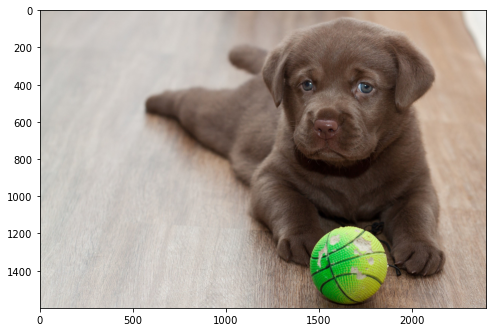

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

### Нелинейное увеличение яркости

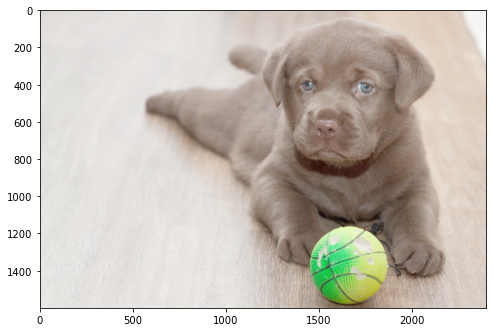

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(img**0.5) # извлечение квадратного корня

### Изменение тона

In [40]:
img_hsv = rgb2hsv(img)

img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] /= 15
img_new = hsv2rgb(img_hsv_new)

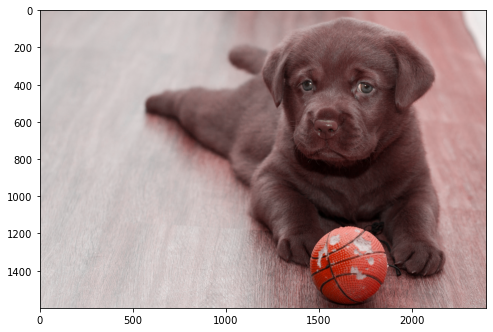

In [41]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

### Свёртка через библиотеку scipy.signal

In [52]:
# Gaussian blur
win_size = (11, 11)
sigma = 3
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

In [57]:
out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

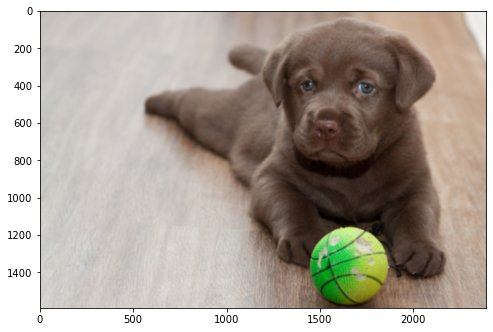

In [58]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)